In [1]:
## Import Libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load datasets 

data = pd.read_csv("./Cost_prediction.csv")

# Display the first few rows
data.head()



,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,gender,education,...,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,F,Partial High School,...,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,Bachelors Degree,...,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,F,Partial High School,...,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,F,High School Degree,...,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,food_category,4.08,1.4280,3,Double Down Sale,USA,M,Partial High School,...,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,Radio,50.79


In [10]:
# Summary statistics
print(data.describe())


       store_sales(in millions)  store_cost(in millions)  \
count              60428.000000             60428.000000   
mean                   6.541031                 2.619460   
std                    3.463047                 1.453009   
min                    0.510000                 0.163200   
25%                    3.810000                 1.500000   
50%                    5.940000                 2.385600   
75%                    8.670000                 3.484025   
max                   22.920000                 9.726500   

       unit_sales(in millions)           SRP  gross_weight    net_weight  \
count             60428.000000  60428.000000  60428.000000  60428.000000   
mean                  3.093169      2.115258     13.806433     11.796289   
std                   0.827677      0.932829      4.622693      4.682986   
min                   1.000000      0.500000      6.000000      3.050000   
25%                   3.000000      1.410000      9.700000      7.710000   
50%

In [11]:
#Explore the first few rows and check for any missing values.

print(data.isnull().sum())

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
gender                      0
education                   0
member_card                 0
occupation                  0
avg. yearly_income          0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
media_type                  0
cost                        0
dtype: int64


Total Sales and Cost Analysis
Calculate the total sales and total cost to understand the overall revenue and cost figures.

In [12]:
# Calculate total sales and total cost
total_sales = data['store_sales(in millions)'].sum()
total_cost = data['store_cost(in millions)'].sum()

print("Total Sales (in millions):", total_sales)
print("Total Cost (in millions):", total_cost)


Total Sales (in millions): 395261.3999999999
Total Cost (in millions): 158288.6987


Profit Margin Analysis
You can calculate the profit and profit margin. Profit is the difference between sales and cost, and profit margin is profit divided by sales.

In [13]:
# Calculate total profit and profit margin
profit = total_sales - total_cost
profit_margin = (profit / total_sales) * 100

print("Total Profit (in millions):", profit)
print("Profit Margin (%):", profit_margin)


Total Profit (in millions): 236972.7012999999
Profit Margin (%): 59.95341343728479


Sales by Product Category
Analyze sales by food_category to identify which categories are generating the most revenue.

In [14]:
# Calculate sales by food category
sales_by_category = data.groupby('food_category')['store_sales(in millions)'].sum()

# Sort categories by sales
sales_by_category = sales_by_category.sort_values(ascending=False)

print(sales_by_category)


food_category
Vegetables              50067.64
Snack Foods             47726.96
Dairy                   25705.33
Meat                    21206.17
Fruit                   20134.93
Jams and Jellies        15400.78
Bread                   11813.05
Breakfast Foods         11328.06
Baking Goods            11313.59
Electrical              11147.72
Paper Products          10767.78
Canned Soup             10419.14
Candy                   10141.97
Beer and Wine           10096.61
Bathroom Products        9403.80
Frozen Desserts          9329.26
Starchy Foods            7790.06
Specialty                7394.15
Kitchen Products         6823.04
Pain Relievers           6511.23
Eggs                     6398.62
Magazines                6207.53
Hot Beverages            5856.23
Pizza                    4889.95
Cleaning Supplies        4729.24
Plastic Products         4622.67
Carbonated Beverages     4467.83
Pure Juice Beverages     4458.40
Hygiene                  4445.85
Drinks                   4220

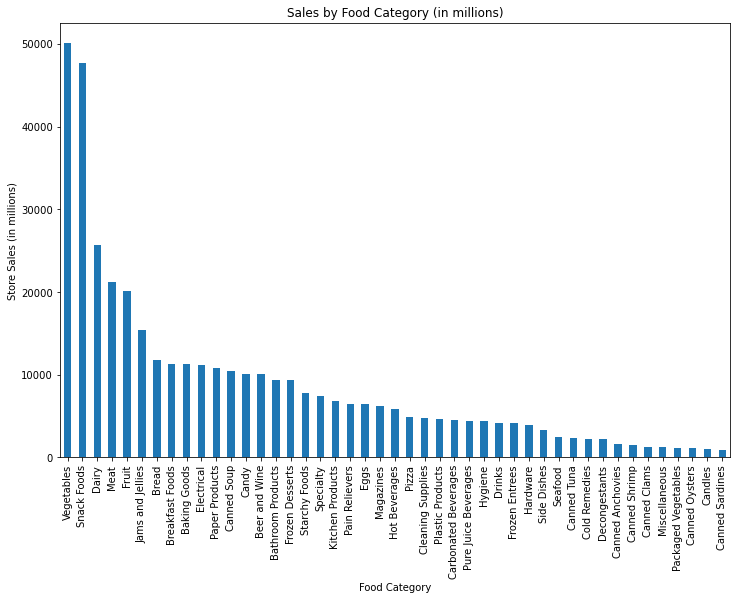

In [32]:
import matplotlib.pyplot as plt

# Bar plot for sales by category
sales_by_category.plot(kind='bar', color='#1f77b4', figsize=(12, 8))
plt.title('Sales by Food Category (in millions)')
plt.xlabel('Food Category')
plt.ylabel('Store Sales (in millions)')
plt.show()


Sales by Store Type and Location
Analyze how different store_type, store_city, and store_state affect sales. For this, group the data by store_type and then by store_state or store_city.

In [23]:
# Sales by store type
sales_by_store_type = data.groupby('store_type')['store_sales(in millions)'].sum()
print(sales_by_store_type)

# Sales by store state
sales_by_state = data.groupby('store_state')['store_sales(in millions)'].sum()
print(sales_by_state)

#Sales by store city
sales_by_store_city = data.groupby('store_city')['store_sales(in millions)'].sum()
print(sales_by_store_city)


store_type
Deluxe Supermarket     152304.54
Gourmet Supermarket     42974.80
Mid-Size Grocery        18963.35
Small Grocery            6493.96
Supermarket            174524.75
Name: store_sales(in millions), dtype: float64
store_state
BC            26277.08
CA            56545.21
DF             9307.09
Guerrero      10047.59
Jalisco        1390.94
OR            70440.12
Veracruz      17297.16
WA           126433.89
Yucatan       30318.51
Zacatecas     47203.81
Name: store_sales(in millions), dtype: float64
store_city
Acapulco         10047.59
Bellingham        2466.29
Beverly Hills    27485.61
Bremerton        23060.10
Camacho          15489.19
Guadalajara       1390.94
Hidalgo          31714.62
Los Angeles      26422.87
Merida           30318.51
Mexico City       9307.09
Orizaba          17297.16
Portland         34675.61
Salem            35764.51
San Francisco     2636.73
Seattle          33538.31
Spokane          29483.11
Tacoma           37886.08
Vancouver        22427.00
Victoria 

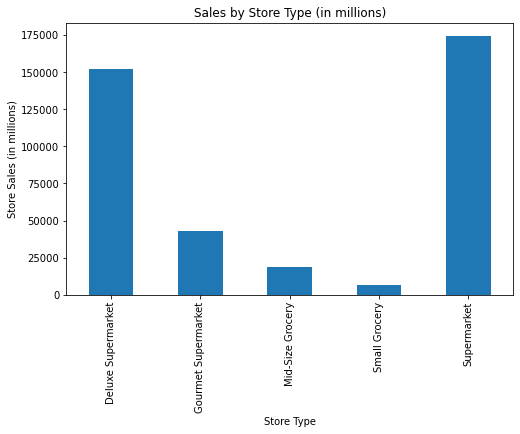

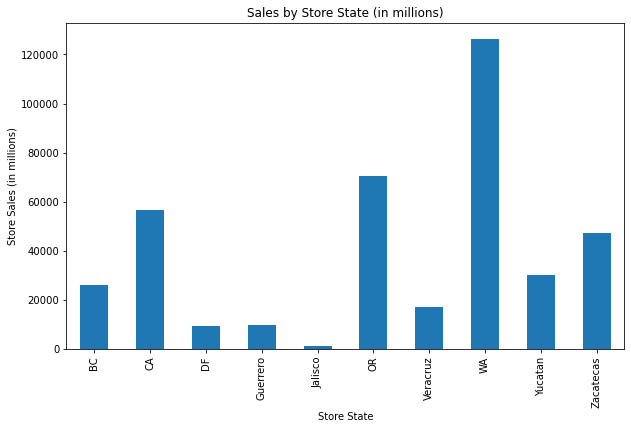

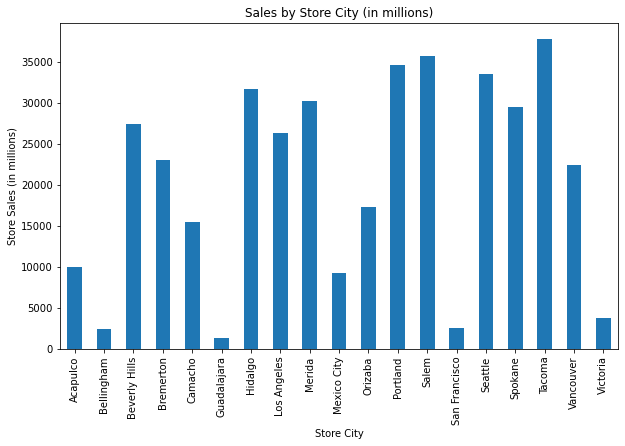

In [33]:
# Bar plot for sales by store type
sales_by_store_type.plot(kind='bar', color='#1f77b4', figsize=(8, 5))
plt.title('Sales by Store Type (in millions)')
plt.xlabel('Store Type')
plt.ylabel('Store Sales (in millions)')
plt.show()

# Bar plot for sales by store state
sales_by_state.plot(kind='bar', color='#1f77b4', figsize=(10, 6))
plt.title('Sales by Store State (in millions)')
plt.xlabel('Store State')
plt.ylabel('Store Sales (in millions)')
plt.show()

# Bar plot for sales by store city
sales_by_store_city.plot(kind='bar', color='#1f77b4', figsize=(10, 6))
plt.title('Sales by Store City (in millions)')
plt.xlabel('Store City')
plt.ylabel('Store Sales (in millions)')
plt.show()

Sales by Promotion
Evaluate the effectiveness of promotions by comparing promotion_name with store_sales.

In [26]:
# Sales by promotion
sales_by_promotion = data.groupby('promotion_name')['store_sales(in millions)'].sum()
sales_by_promotion = sales_by_promotion.sort_values(ascending=False)

print(sales_by_promotion)


promotion_name
Weekend Markdown           15378.81
Price Savers               15290.61
Two Day Sale               15201.72
Price Winners              13925.79
Save-It Sale               13227.02
Super Savers               12858.23
Super Duper Savers         12841.17
One Day Sale               11658.77
High Roller Savings        11548.20
Double Down Sale           11443.00
Shelf Clearing Days        11394.93
Green Light Days           11179.51
Price Slashers             11150.16
Free For All               10553.45
Go For It                  10124.34
Money Savers               10031.30
Cash Register Lottery       9821.71
Big Time Discounts          9805.89
Two for One                 9795.77
Price Destroyers            9098.54
Saving Days                 8916.86
Dollar Cutters              8478.62
Unbeatable Price Savers     7914.11
Sales Galore                7840.59
Big Promo                   7503.66
Dimes Off                   7482.87
Sales Days                  7425.76
Price Cutters

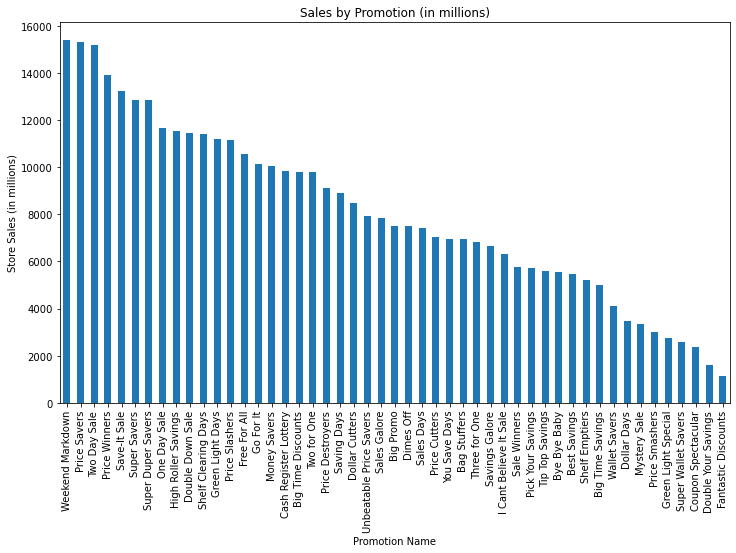

In [34]:
#Visualize this to see the promotions that drive the most sales:
# Bar plot for sales by promotion
sales_by_promotion.plot(kind='bar', color='#1f77b4', figsize=(12, 7))
plt.title('Sales by Promotion (in millions)')
plt.xlabel('Promotion Name')
plt.ylabel('Store Sales (in millions)')
plt.show()


Profit Margin by Product Category
You can also calculate profit margins for each food_category to identify the most profitable categories.

In [28]:
# Calculate profit margin by category
data['profit'] = data['store_sales(in millions)'] - data['store_cost(in millions)']
profit_margin_by_category = data.groupby('food_category').apply(
    lambda x: (x['profit'].sum() / x['store_sales(in millions)'].sum()) * 100
)

print(profit_margin_by_category)


food_category
Baking Goods            60.020223
Bathroom Products       59.974684
Beer and Wine           59.901900
Bread                   59.976457
Breakfast Foods         59.959227
Candles                 59.390374
Candy                   59.998643
Canned Anchovies        59.592305
Canned Clams            60.996296
Canned Oysters          60.063152
Canned Sardines         60.187635
Canned Shrimp           58.668648
Canned Soup             59.780542
Canned Tuna             60.138657
Carbonated Beverages    60.313577
Cleaning Supplies       59.674464
Cold Remedies           59.694976
Dairy                   59.791007
Decongestants           60.009261
Drinks                  59.894303
Eggs                    60.021637
Electrical              59.837601
Frozen Desserts         59.962639
Frozen Entrees          60.080432
Fruit                   59.952936
Hardware                59.794398
Hot Beverages           60.007831
Hygiene                 59.863610
Jams and Jellies        60.179882


Unit Sales Analysis by Food Department
Look at unit_sales(in millions) by food_department to find out which departments sell the most units.

In [29]:
# Unit sales by department
unit_sales_by_department = data.groupby('food_department')['unit_sales(in millions)'].sum()
unit_sales_by_department = unit_sales_by_department.sort_values(ascending=False)

print(unit_sales_by_department)


food_department
Produce                26361
Snack Foods            21491
Household              19089
Frozen Foods           18909
Baking Goods           13868
Canned Foods           13079
Dairy                  11825
Health and Hygiene     11767
Beverages               9324
Deli                    8638
Baked Goods             5552
Alcoholic Beverages     4951
Snacks                  4822
Starchy Foods           3433
Periodicals             2956
Eggs                    2926
Breakfast Foods         2415
Canned Products         1243
Checkout                1205
Meat                    1199
Seafood                 1164
Carousel                 697
Name: unit_sales(in millions), dtype: int64


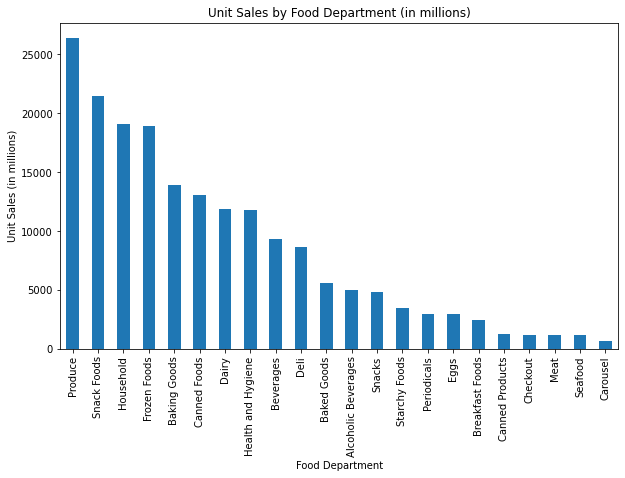

In [35]:
# Bar plot for unit sales by department
unit_sales_by_department.plot(kind='bar', color='#1f77b4', figsize=(10, 6))
plt.title('Unit Sales by Food Department (in millions)')
plt.xlabel('Food Department')
plt.ylabel('Unit Sales (in millions)')
plt.show()


Summary:

This guide has walked through several key steps to analyze sales performance. Here’s a quick recap:

Total Sales and Cost Analysis
Profit and Profit Margin Calculation
Sales by Product Category, Store Type, Store City and Location
Sales by Promotion Analysis
Profit Margin by Product Category
Unit Sales Analysis by Department